In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif

In [3]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [4]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, plot_roc_curve

In this file, we performed K-means clustering on the prepossed mRNA table. See Data Processing folder for how to obtain desired table from raw data. We presented:
1. The optimal number of variables to perform K-means clustering.
2. Confusion Matrix and MCC score
3. Ability to classify metastesis cancer with only two variables.

In [5]:
# load data file
data = pd.read_csv('/home/DAVIDSON/jiqian/Workspace/IS/CancerBioInfo/Data Processing/data_processed.csv')
data

,PATH_N_STAGE,M_CTNNAL1,M_C16ORF91,M_PRSS27,M_HIST1H3J,M_OAS1,M_CKS1B,M_MAP6D1,M_LOC100129935,M_GABPB2,...,M_HLA-DPB1,M_HPDL,M_ZC3H11A,M_TESPA1,M_RAB39A,M_ATG16L1,M_RNF135,M_CAPN14,M_RABL2A,M_ASB13
0,2.0,-0.7253,-0.0768,-0.0967,-0.6287,-0.1719,-0.5324,-0.0323,-0.0489,-0.5993,...,-0.7532,4.1173,0.3612,-0.7000,-0.4913,-0.0141,-0.1810,-0.3636,0.0976,-1.3205
1,2.0,0.3567,-0.7217,-0.2737,0.0056,-0.6596,-0.7607,-0.7301,-0.0489,-0.7948,...,-0.8281,0.2793,0.1532,-0.5564,-0.2891,-0.4861,-0.0159,0.8203,0.4123,0.3274
2,2.0,-1.6328,-1.2149,-0.6054,0.3899,-0.1846,-0.8369,-0.5067,-0.0489,-2.0156,...,-1.1604,0.8328,-1.1808,-0.6206,0.0872,0.1618,1.3626,-0.1659,0.8552,0.2087
3,2.0,0.5051,0.2343,-0.5626,0.9624,-0.5755,-0.2063,0.7426,-0.0489,0.8774,...,-0.6370,-0.4139,0.7234,-0.6513,-0.1241,0.8600,-0.1750,-0.6490,-1.0373,0.2868
4,2.0,1.6196,0.3325,-0.4805,-0.6287,-0.5363,0.0658,-0.6350,-0.0489,0.4251,...,-0.5394,-0.2538,0.5924,-0.4398,-0.4335,-1.9213,-0.3402,-0.7131,-0.6063,0.4258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1.0,-0.0506,-0.2335,0.3169,-0.0826,-0.2698,0.8429,0.2255,-0.0489,3.2326,...,2.2672,0.3750,-0.5360,3.5292,-0.2015,-0.6994,0.9662,-0.0530,0.1612,-1.1149
413,1.0,0.5306,0.0369,-0.5095,0.5126,-0.4321,0.0187,0.6411,-0.0489,1.1949,...,0.6081,-0.0431,0.2345,0.9109,0.0642,0.7365,0.3810,-0.3108,1.0893,0.5753
414,1.0,3.3271,1.7487,-0.3745,0.5228,-0.1579,1.6761,4.1996,-0.0489,4.4300,...,1.0021,-0.3415,1.4632,1.1339,0.3670,-0.3613,-0.6580,0.6786,1.1767,-0.6225
415,1.0,-1.1593,0.1446,4.7902,0.0459,1.8775,0.7112,-0.4126,-0.0489,0.9277,...,3.6217,-0.4544,1.8294,4.3256,0.0244,-0.2576,1.2125,0.5778,1.2353,-0.6806


In [6]:
# Split the data into 80%/20%
data_train, data_test = train_test_split(data, test_size = 0.2, random_state=42)
data_train = data_train.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)

In [7]:
X = data_train.iloc[:,1:]
y = data_train['PATH_N_STAGE']

### Run ANOVA F value again

This move recalculate ANOVA F-value for all features so that the order of the features to include in the model best reflect difference between groups instead of within group.

In [8]:
f_values, p_values = f_classif(X,y)
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [9]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': X.columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = X[columns]
X = selected
X

,M_C16ORF91,M_CTNNAL1,M_MAP6D1,M_HIST1H2AK,M_ASH1L-AS1,M_HIST1H3J,M_SPATA46,M_GOLGA1,M_PRSS27,M_HIST1H2BN,...,M_RAD9A,M_RPA4,M_BBC3,M_HOTAIR,M_DUX4L6,M_KISS1R,M_KCNJ9,M_PIGL,M_LOC100129935,M_OR10G9
0,0.8792,-0.0361,-0.3510,-0.3868,0.0693,-0.2442,-0.6439,0.8551,0.1356,1.2886,...,0.4958,-0.2268,-0.2790,-0.1641,5.0093,-0.1309,3.4446,0.3162,-0.0489,-0.0504
1,1.1363,-0.2450,-0.2738,-0.1765,0.3303,0.3021,0.2213,0.1103,-0.0034,-0.7416,...,-0.4151,-0.1522,1.4193,2.6129,-0.1881,-0.2389,1.4233,-0.0742,-0.0489,-0.0504
2,-0.7364,-0.3339,-1.1468,-0.1550,0.1437,-0.6287,-0.6439,-0.7200,-0.2643,-0.3989,...,-0.2748,-0.1527,0.1968,-0.3996,-0.1881,-0.1954,-0.7553,-0.1914,-0.0489,-0.0504
3,-0.9999,-1.2376,-0.4907,-0.2636,-0.2875,-0.6287,3.5319,0.7420,0.0393,-1.5120,...,-0.3144,-0.5817,-0.6945,0.3986,-0.1881,-0.2389,0.7469,0.5225,-0.0489,-0.0504
4,2.6742,-0.2704,-0.6972,-0.7952,-0.2508,-0.6287,-0.6439,-0.4717,-0.6117,-0.6322,...,0.9930,0.0924,-0.6307,1.0482,-0.1881,-0.1363,-0.1854,-0.6224,-0.0489,-0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,0.2992,-0.8179,-0.3634,-0.8512,-0.0060,0.5137,0.3913,-0.5895,-0.2057,...,-0.7982,-0.2943,-0.5631,-0.4145,-0.1881,-0.2098,-0.1075,-0.6982,-0.0489,-0.0504
329,-0.6168,-0.5563,0.1017,-0.1894,0.1920,-0.6287,0.3637,0.0425,0.3491,-0.9687,...,0.1278,-0.4566,-0.7463,0.1092,-0.1881,-0.2008,-0.3324,0.3953,-0.0489,-0.0504
330,0.8713,1.3086,0.9111,1.4000,1.0178,-0.1033,-0.6439,3.4720,0.5115,0.9060,...,1.6843,0.0245,-0.1362,-0.3681,3.3634,-0.0913,-0.7553,1.8720,-0.0489,-0.0504
331,-1.1250,1.3591,-0.6607,-0.1890,-0.9390,0.5643,1.0194,-0.5864,-0.4240,-0.0317,...,-1.1615,-0.4441,-0.6757,-0.4448,-0.1881,-0.2389,-0.7553,-0.8009,-0.0489,-0.0504


### Calcualte MCC and accuracy

These two functions were necessary to predict how well out models do

In [10]:
# This is a function that takes in the X,y,and total number of features to consider 
# and returns the MCC value using given amount of variables
def MCC_func(X_train,y_true,index):
    data_kmeans = model.fit(X_train.iloc[:,0:index+1])
    #print(X_train.iloc[:,0:2])
    y_pred = data_kmeans.predict(X_train.iloc[:,0:index+1])
    case1 = y_pred+1.0
    y_pred[y_pred == 0] = 2.0
    case2 = pd.DataFrame(y_pred)+0.0
    MCC1 = matthews_corrcoef(y_true, case1)
    MCC2 = matthews_corrcoef(y_true, case2)
    return max(MCC1,MCC2)

In [11]:
def accuracy_func (X_train,y_ture,index):
    data_kmeans = model.fit(X_train.iloc[:,0:index+10])
    y_pred = data_kmeans.predict(X_train.iloc[:,0:index+10])
    case1 = y_pred+1.0
    y_pred[y_pred == 0] = 2.0
    case2 = pd.DataFrame(y_pred)+0.0
    accuracy1 = metrics.accuracy_score(y_ture, case1)
    accuracy2 = metrics.accuracy_score(y_ture, case2)
    return max(accuracy1, accuracy2)

### Kmean clustering and performance evaluation
The following code may take a long time to run. For small trials, change the while loop to i<= 100.

#### MCC

In [12]:
model = KMeans(n_clusters=2) 
MCC = []
i = 0
while i<= 1000:
    score = MCC_func(X,y,i)
    MCC.append(score) # collect MCC score of the top ith features with the highest ANOVA F-value
    i += 1

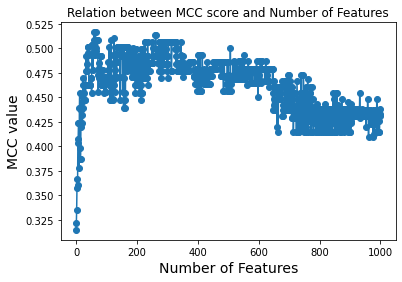

In [13]:
index = list(range(0,1001))
plt.plot(index, MCC, '-o')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('MCC value', fontsize=14)
plt.title('Relation between MCC score and Number of Features')
plt.show()

The result indicated that as features increase by 1, MCC value increased steadily from 0 to around 60, and then remained steady till 500. Our current trend matched the result shown in the paper. 

Next, we wish to find the optimal number of variables.

In [14]:
MCC_pd = pd.DataFrame(MCC, columns = ['MCC'])
MCC_pd.sort_values(by = ['MCC'], ascending=[False]).iloc[:10,:]

,MCC
64,0.516523
59,0.516523
262,0.513551
261,0.513551
124,0.510198
71,0.508207
58,0.508207
68,0.508207
69,0.508207
70,0.508207


After taken 1000 features into account, we found that 58 features would be the optimal number in attaining the best K mean clustering. This is inconsistent with the paper that indicated 30 as the optimal number of features.

#### Accuracy

In [15]:
model = KMeans(n_clusters=2) 
accuracy = []
i = 0
while i<= 100:
    score = accuracy_func(X,y,i)
    accuracy.append(score)
    i += 1

ValueError: x and y must have same first dimension, but have shapes (1001,) and (101,)

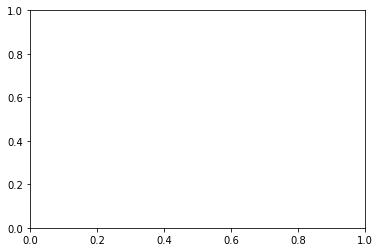

In [16]:
index = list(range(0,1001))
plt.plot(index, accuracy, '-o')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Relation between Accuracy score and Number of Features')
plt.show()

If we plot the accuracy graph. The trend matched what we found about the MCC score.

In [ ]:
accu_pd = pd.DataFrame(accuracy, columns = ['accuracy'])
accu_pd.sort_values(by = ['accuracy'], ascending=[False]).iloc[:10,:]

Interestingly, the highest accuracy score was not modeled by 58 features. Since MCC is a better indicator for model performance than accuracy, we will consider 58 as our optimal number of features. 

#### Compile two graphs together

In [ ]:
index = list(range(0,1001))
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(index, accuracy, '-o', markersize=1)
plt.plot(index, MCC, '-o', markersize=1)

plt.text(index[-1], accuracy[-1], 'Accuracy', ha='right', va='bottom', fontsize=18, color='blue')
plt.text(index[-1], MCC[-1], 'MCC', ha='right', va='bottom', fontsize=18, color='orange')

plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Relation between Scores and Number of Features')
plt.show()

#### Verify with paper

In [ ]:
bestmany = 58
tryit = X.iloc[:,:bestmany]

In [ ]:
tfeatures = ['M_SPAG1', 'M_PLEKHF2','M_RALGPS1','M_OMP', 'M_CTNNAL1','M_ZBTB34','M_ODF2','M_FKBP15','M_GOLGA1','M_CHAF1B',
                'M_ORAOV1','M_ZNF174','M_C20ORF204','M_ZNF263','M_HIST1H2BI','M_NUP85','M_KIF18A','M_ARPC5L',
             'M_ANKRD13D','M_ZBTB43','M_ABCA17P']
ins = []
for feature in tfeatures:
    if feature in tryit:
      ins.append(tryit[feature])
ins = pd.DataFrame(ins).transpose()
ins

However, within the top 58 features, only 8 of the 20 features selected by the paper appeared. Within the top 30 features, only 5 of the 20 features selected by the paper appeared.

In [ ]:
paper = X[include]
model = KMeans(n_clusters=2) 
data_kmeans = model.fit(paper)
y_pred = data_kmeans.predict(paper)
# the following simplifies the function MCC() that calculates MCC
case1 = y_pred+1.0
y_pred[y_pred == 0] = 2.0
case2 = pd.DataFrame(y_pred)+0.0
MCC1 = matthews_corrcoef(y, case1)
MCC2 = matthews_corrcoef(y, case2)
print(max(MCC1,MCC2))

Moreover, even if we used the 20 featues from the paper to run Kmean clustering, the MCC value is smaller than our best performance. This indicated that given current dataset, our modeling using 58 features is the best model. For future improvement and comparison with the paper, we think there might be other lists of 30 genes selected by the paper that we missed.

#### The Best K-Means clustering Model

In [ ]:
model = KMeans(n_clusters=2)
bestmany = 58
BestModel = model.fit(X.iloc[:,0:bestmany])
y_pred_best = BestModel.predict(X.iloc[:,0:bestmany])
y_pred_pd = pd.DataFrame(y_pred_best)
centroids = BestModel.cluster_centers_

In [ ]:
#notice that every time we run the function, our y_pred_labeled changed. I don't like this
def label_ypred(y_true, y_predict):
    case1 = y_predict+1.0
    y_predict[y_predict == 0] = 2.0
    case2 = pd.DataFrame(y_predict)+0.0
    MCC1 = matthews_corrcoef(y_true, case1)
    MCC2 = matthews_corrcoef(y_true, case2)
    if (max(MCC1,MCC2) == MCC1):
        y_pred = case1
        print('it is case 1')
    else:
        y_pred = case2
        print('it is case 2')
    return y_pred

In [ ]:
y_pred_labeled = label_ypred(y, y_pred_best)

In [ ]:
X # Use this table to find the 2 best features

#### 2D visualization
Finally, to visualize Kmean clustering on a 2D map, we chose 2 genes with highest ANOVA F-vlaue C16ORF91 and MAP6D1. 

In [ ]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_C16ORF91'], y=X['M_MAP6D1'], s=50,
            c=y_pred_pd.astype('category'), 
            cmap = customcmap, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_C16ORF91', fontsize=14)
ax.set_ylabel(r'M_MAP6D1', fontsize=14)
plt.title('Predicted Classes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_RALGPS1'], y=X['M_SPAG1'], s=50,
            c=y_pred_pd.astype('category'), 
            cmap = customcmap, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_RALGPS1', fontsize=14)
ax.set_ylabel(r'M_SPAG1', fontsize=14)
plt.title('Predicted Classes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(y, y_pred_labeled, labels=[1.0, 2.0]) 
fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k', constrained_layout=True, subplot_kw=dict(aspect='equal'))
class_names = ['N1','N0']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Actuals', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=14)
plt.show()